:# PRACTICA2: Análisis de dimensionalidad: PCA, Kernel PCA e ISOMAP
*Elaborado por: Luis Fernando Becerra, BEDA Aprendizaje de Máquinas 2024-1S *

Una de las tareas del aprendizaje no supervisado es la reducción de dimensiones, la cual sirve para encontrar espacios de representación en más bajas dimensiones que los datos originales. Reducir las dimensiones de un conjunto de datos puede emplearse para:


*   Visualización de datos y analisis exploratorio
*   Etapa de extracción/selección de caracteristicas para mejorar la discriminación de los datos

En esta práctica vamos a revisar tres técnicas comunes de reducción de dimensiones no supervisada.



##Importar librerias
Vamos a usar las librerias comunes numpu, panda, matplotlin y seaborn

In [ ]:
#importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#   1. Análisis de componentes principales (PCA):

Ayuda a minimizar el número de variables (o columnas de un marco de datos) sin perder gran parte de la información original. Esto es útil especialmente cuando se construyen modelos de aprendizaje automático basados en datos con muchas caracteristicas, como 100 o 1000.

Mientras que la regresión determina una línea de mejor ajuste a un conjunto de datos, el análisis factorial o el análisis de componentes principales determina varias líneas ortogonales de mejor ajuste al conjunto de datos. Las líneas son perpendiculares entre sí en un espacio de n dimensiones, en el que n dimensiones es el espacio muestral de las variables. Hay tantas dimensiones como variables, es decir, un conjunto de datos con 4 variables, el espacio muestral es de 4 dimensiones.

Si utilizamos esta técnica en un conjunto de datos con un gran número de variables, podemos comprimir la cantidad de variación explicada a unos pocos componentes.

El PCA no es más que una transformación de nuestros datos e intenta averiguar qué características explican la mayor parte de la varianza de nuestros datos.

Intentamos deshacernos de los componentes que no explican suficientemente la varianza de nuestros datos.

#Carga de datos
Para esta practica utilizaremos la base de datos Wine de la Universidad UC Irvine. Vamos a emplear a reducción de dimensiones tanto para visualizar los datos como para mejor la discriminación de tres tipos de variedades de vinos.

Las caracteristicas incluyen diferentes componentes quimicos medidos en laboratorio.

1. Alcohol
2. Ácido málico
3. Ceniza
4. Alcalinidad de la ceniza
5. Magnesio
6. Fenoles totales
7. Flavanoides
8. Fenoles no flavonoides
9. Proantocianinas
10. Intensidad de color
11. Tono
12. DO280/OD315 de vinos diluidos
13. Prolina


In [ ]:
#Leer datos


Exploremos los datos!!

In [ ]:
#Revisar los 5 primeros elementos


In [ ]:
#Nombre de las caracteristicas


En este conjunto de datos hay 14 dimensiones o variables, por lo que es difícil visualizarlas todas. Podemos utilizar PCA para aprender los dos componentes más importantes de los datos y visualizarlos en este nuevo espacio bidimensional.

Tenemos que aplicar el PCA antes de aplicar el algoritmo de aprendizaje automático.

Deberíamos aplicarlo a las características, no al valor objetivo "Customer Segment" en este conjunto de datos. Por tanto, vamos a crear un dataframe con todas las columnas excepto la ultima (correspondiente al tipo de vino)


In [ ]:
#Organizar dataframe

Ahora vamos a dividir los datos en los dos conjuntos: entrenamiento y prueba. Empleando 70% de los datos para entrenar. Esto con el fin de probar que ocurre con la discriminación de las clases cuando aplicamos PCA.

In [ ]:
#Dividir datos

Antes de usar PCA en los datos, necesitamos necesitamos estandarizar las diferentes caracteristicas, para esto utilizaremos StandardScaler de sklearn. El cual transforma los datos a muestras con media cero y desviación estandar igual a 1. Esta normalizacion es la más recomendada cuando se va aplicar PCA.

In [ ]:
#Importar StandardScaler

#Aplicar la transformación a los datos de entrenamiento

#Usar la transformación a los datos de evaluación


Nota importante: cuando entrenamos un clasificador o regresor con datos reducidos, es muy importante que al aplicarlo a otros datos estos se encuentren normalizados!!!

In [ ]:
#Grafiquemos dos dimensiones de los datos!!
plt.figure(figsize=(15,10))
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],c='r')
plt.scatter(X_train[y_train==2,0],X_train[y_train==2,1],c='b')
plt.scatter(X_train[y_train==3,0],X_train[y_train==3,1],c='g')
plt.xlabel("Alcohol")
plt.ylabel("Malic_Acid")

##Aplicar PCA
PCA es una tecnica muy comun que vamos a encontrar implementada en diferentes paquetes estadisticos. Vamos a usar la implementación disponible en sklearn.

In [ ]:
#Importar PCA

#Inicializar PCA: vamos a comenzar probando con 2 componentes principales para la proyección

#Calcular PCA y realizar la transformación de datos de entrenamiento

#Aplicar a los datos de prueba


Revisemos la dimension de los datos reducidos

In [ ]:
# Hemos  reducido las  caracteristicas en 2


Vamos a graficar los datos de entrenamiento proyectados en la primera y segunda componente princial.

In [ ]:
#Grafica de dos dimensiones
plt.figure(figsize=(15,10))
plt.scatter(X_train_2d[y_train==1,0],X_train_2d[y_train==1,1],c='r')
plt.scatter(X_train_2d[y_train==2,0],X_train_2d[y_train==2,1],c='b')
plt.scatter(X_train_2d[y_train==3,0],X_train_2d[y_train==3,1],c='g')
plt.xlabel("The First Principal Component")
plt.ylabel("The Second Principal Component")


In [ ]:
#Las PCA son vectores a los cuales se proyecta los datos


Importante: el proceso de transformación PCA no tiene en cuenta las etiquetas de los datos!!

#Uso de datos para ML
Tras aplicar el PCA, podemos usar los datos proyectados para entrenar un modelo ML, en este caso vamos a usar una regresión logistica.

In [ ]:
#Importarmos el modelo

#Entrenamos un modelo con los datos originales (para comparar)


In [ ]:
#Entrenamos un modelo con los datos reducidor con PCA


In [ ]:

#Evaluar el desempeño - Modelo datos completo
#Matriz de confusión

# Métricas de desempeño


In [ ]:
#Evaluar el desempeño - Modelo con PCA
#Matriz de confusión

# Métricas de desempeño



In [ ]:
#Grafica de las fronteras de desicion
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_2d, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model_pca.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Este es el rendimiento del algoritmo con el conjunto de entrenamiento

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_2d, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model_pca.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Esta es la visualización del rendimiento del algoritmo con el conjunto de pruebas

#  2. Kernel PCA
Es otra tecnica de reducción de dimensiones no supervisada, que permite trabajar con no linealidades de los datos usando el truco kernel.

#  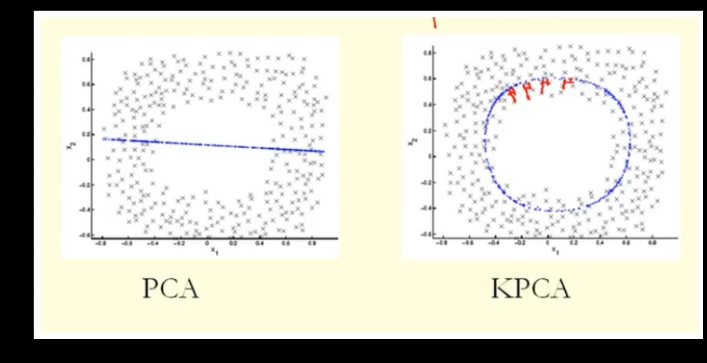

Los métodos kernel buscan una dimensión más alta, mientras que SVD busca una dimensión más baja.

PCA (como técnica de reducción de la dimensionalidad) intenta encontrar un subespacio lineal de baja dimensión al que se limitan los datos.

El Kernel PCA puede encontrar este múltiple no lineal y descubrir que los datos son, de hecho, casi unidimensionales.

Los datos se mapean en un espacio de mayor dimensión, pero luego resultan estar en un subespacio de menor dimensión del mismo. Así que se aumenta la dimensionalidad para poder reducirla.

Vamos a aplicar KPCA al mismo conjunto de datos


In [ ]:
#Importamos KernelPCA

#Seleccionamos 2 componentes y el kernel gaussiano

#Calculamos las componentes principales y se proyectan los datos


Vamos aplicarle el mismo modelo regresión logistica, a los datos reducidos con kpca.


In [ ]:
#Entrenamos el modelo


In [ ]:
#Evaluar el desempeño - Modelo con KPCA
#Matriz de confusión
cmKPCA = confusion_matrix(y_test, predictions_kpca)
disp = ConfusionMatrixDisplay(confusion_matrix=cmKPCA)
disp.plot()
# Métricas de desempeño
print(classification_report(y_test,predictions_kpca))
print("kappa: " + str(cohen_kappa_score(y_test,predictions_kpca)))

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_kpca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model_kpca.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_kpca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model_kpca.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

#  3. ISOMAP


In [ ]:
#Importamos isomap

#Seleccionamos 2 componentes y el kernel gaussiano

#Calculamos las componentes principales y se proyectan los datos


In [ ]:
#Entrenamos el modelo


              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.96      0.96      0.96        24
           3       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54

kappa: 0.9428571428571428


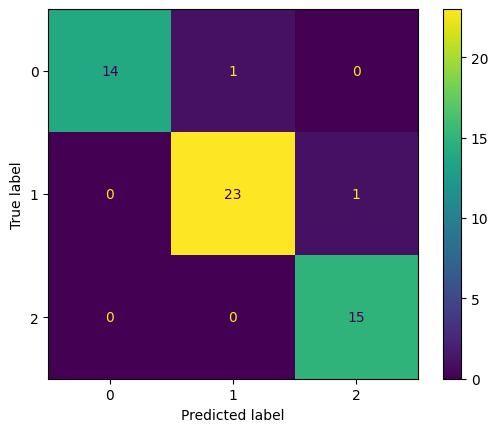

In [ ]:
#Evaluar el desempeño - Modelo con isomap
#Matriz de confusión
cmISOMAP = confusion_matrix(y_test, predictions_isomap)
disp = ConfusionMatrixDisplay(confusion_matrix=cmISOMAP)
disp.plot()
# Métricas de desempeño
print(classification_report(y_test,predictions_isomap))
print("kappa: " + str(cohen_kappa_score(y_test,predictions_isomap)))

# ¡Gran trabajo!